In [116]:
import numpy as np
import math
import cv2 as cv,cv2
from matplotlib import pyplot as plt

img = cv.imread('DJI_0829.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)      

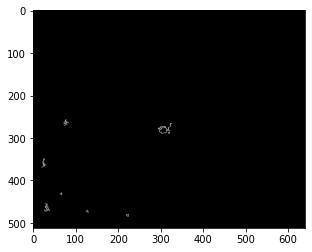

In [117]:
lowThreshold = 60
highThreshold = 240
img_edges = cv.Canny(img_gray, lowThreshold, highThreshold, True)
plt.imshow(img_edges,cmap='gray')
plt.show()

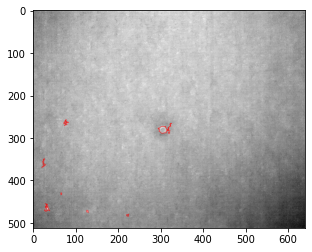

In [118]:
img_original = img.copy()

contours, hierarchy = cv2.findContours(img_edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_original, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(img_original)
plt.show()

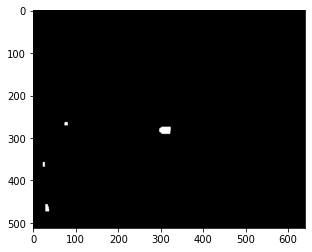

In [119]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
img_morph = cv.morphologyEx(img_edges, cv.MORPH_CLOSE, kernel, iterations=1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img_morph = cv.morphologyEx(img_morph, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(img_morph,cmap='gray')
plt.show()

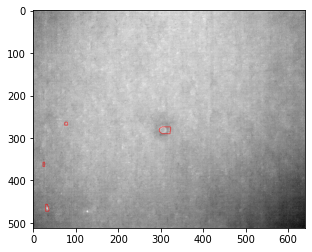

In [120]:
img_original = img.copy()

contours, hierarchy = cv2.findContours(img_morph, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_original, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(img_original)
plt.show()

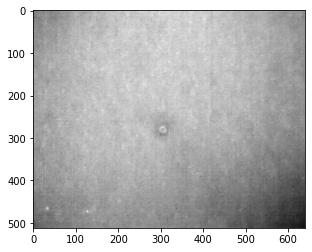

In [121]:
img_original = img.copy()
filtersContours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 150 and area < 300:
        perimeter = cv2.arcLength(cnt, True)
        circularity = 4*math.pi*(area/(perimeter*perimeter))
        if 0.8 < circularity < 1.2:
            filtersContours.append(cnt)

cv2.drawContours(img_original, contours=filtersContours, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(img_original)
plt.show()